**Transformações**
* Transformação afim - preserva as relações paralelas entre partes da imagem, uma vez que a distância entre os pixels durante a transformação se mantém a mesma.
* Transformação de perspectiva - mudança de perspectiva da imagem em relação a um certo conjunto de pontos adotados.

Roteiro da prática:

1. Ler a imagem do triangulo
2. Criar os pontos para a matriz de transformação afim
3. Utilizar a função `getAffineTransform()` para criar a matriz
4. Utilizar a função `warpAffine()`para realizar a transformação
5. Ler a imagem da carta
6. Declarar 8 pontos para a matriz de transformação
7. Utilizar a função `getPerspectiveTransform()` para criar a matriz
8. Utilizar a função `warpPerspective()`para realizar a transformação


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
!wget https://raw.githubusercontent.com/catarinaluz/Treinamento-visao/main/images/carta.jpeg
!wget https://raw.githubusercontent.com/catarinaluz/Treinamento-visao/main/images/triangle.jpg

--2023-02-24 14:18:46--  https://raw.githubusercontent.com/catarinaluz/Treinamento-visao/main/images/carta.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44369 (43K) [image/jpeg]
Saving to: ‘carta.jpeg’

carta.jpeg          100%[===================>]  43.33K  --.-KB/s    in 0.007s  

2023-02-24 14:18:46 (6.45 MB/s) - ‘carta.jpeg’ saved [44369/44369]

--2023-02-24 14:18:46--  https://raw.githubusercontent.com/catarinaluz/Treinamento-visao/main/images/triangle.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8134 (7.9K) [im

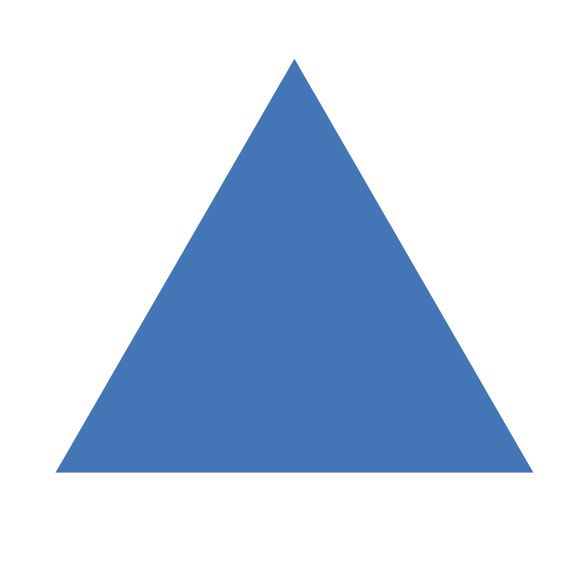

In [3]:
img_triangle = cv.imread('triangle.jpg')
cv2_imshow(img_triangle)

In [12]:
img_triangle_points = np.zeros(shape = (3,2), dtype = np.float32)

img_triangle_points[0] = (60,470)
img_triangle_points[1] = (296,66)
img_triangle_points[2] = (524,471)

img_triangle_points

array([[ 60., 470.],
       [296.,  66.],
       [524., 471.]], dtype=float32)

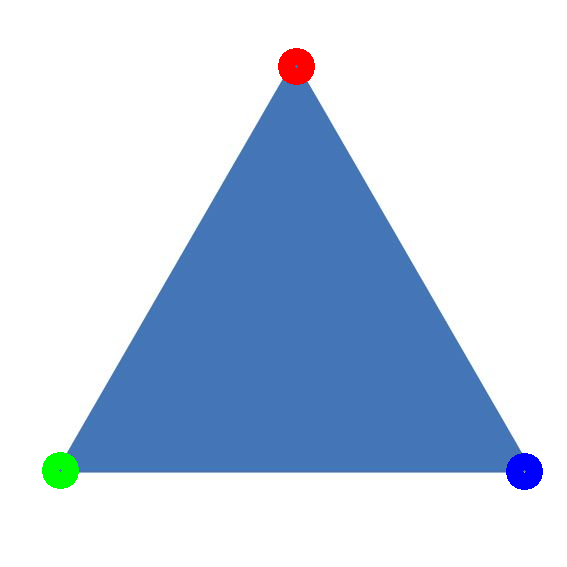

In [9]:
cv.circle(img = img_triangle,
          center = img_triangle_points[0],
          radius =10,
          color = (0,255,0),
          thickness = 10);

cv.circle(img = img_triangle,
          center = img_triangle_points[1],
          radius =10,
          color = (0,0,255),
          thickness = 10);

cv.circle(img = img_triangle,
          center = img_triangle_points[2],
          radius =10,
          color = (255,0,0),
          thickness = 10);

cv2_imshow(img_triangle)


In [13]:
transf_points_triangle = np.zeros(shape = (3,2), dtype = np.float32)

transf_points_triangle[0] = (249,503)
transf_points_triangle[1] = (443,224)
transf_points_triangle[2] = (80,137)

In [14]:
transf_afin = cv.getAffineTransform(img_triangle_points,transf_points_triangle)

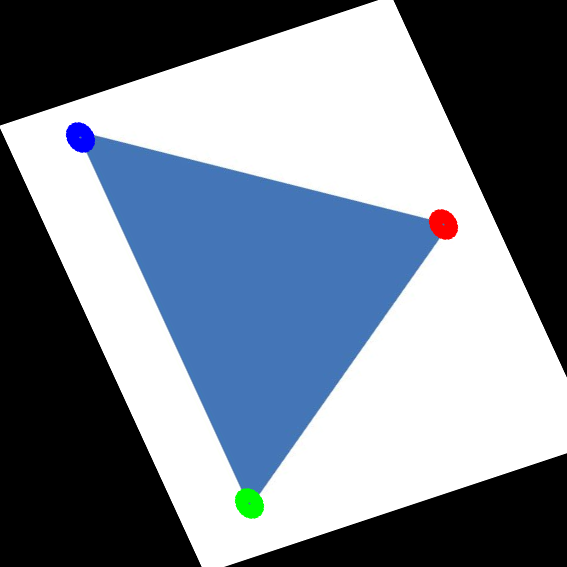

In [18]:
warp_triangle = cv.warpAffine(img_triangle, transf_afin, (img_triangle.shape[1], img_triangle.shape[0]))

cv2_imshow(warp_triangle)

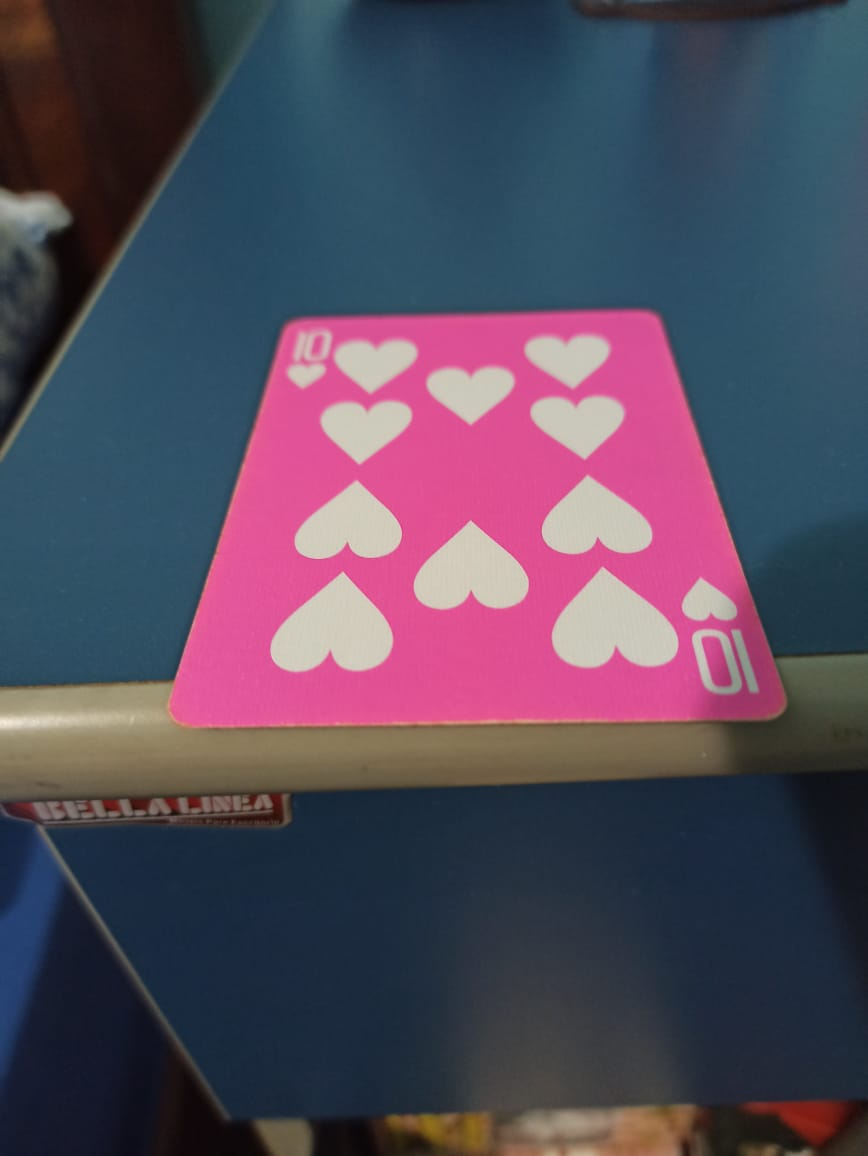

In [29]:
img_carta = cv.imread('carta.jpeg')
cv2_imshow(img_carta)

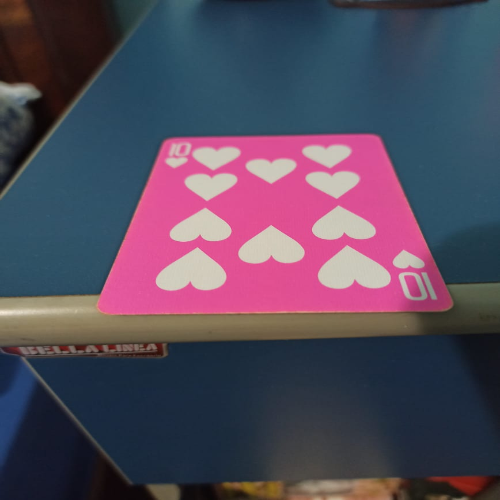

In [30]:
img_carta = cv.resize(img_carta,(500,500))
cv2_imshow(img_carta)

In [32]:
img_carta_points = np.zeros(shape = (4,2), dtype = np.float32)

img_carta_points[0] = (98,307)
img_carta_points[1] = (167,139)
img_carta_points[2] = (377,135)
img_carta_points[3] = (449,301)

img_carta_points

array([[ 98., 307.],
       [167., 139.],
       [377., 135.],
       [449., 301.]], dtype=float32)

In [33]:
transf_points_carta = np.zeros(shape = (4,2), dtype = np.float32)

transf_points_carta[0] = (82,400)
transf_points_carta[1] = (120,50)
transf_points_carta[2] = (388,50)
transf_points_carta[3] = (442,400)

transf_points_carta

array([[ 82., 400.],
       [120.,  50.],
       [388.,  50.],
       [442., 400.]], dtype=float32)

In [34]:
transf_persp = cv.getPerspectiveTransform(img_carta_points, transf_points_carta)

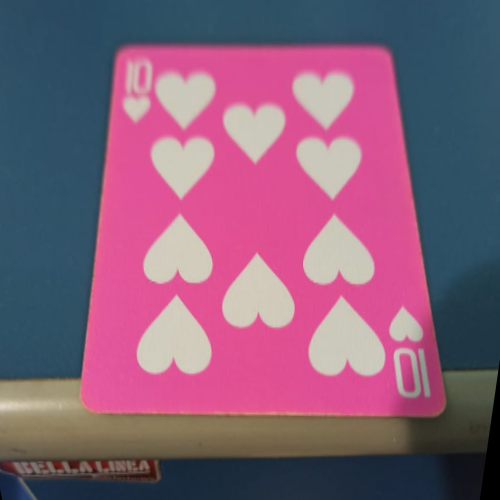

In [35]:
warp_carta = cv.warpPerspective(img_carta,transf_persp, (img_carta.shape[1], img_carta.shape[0]))

cv2_imshow(warp_carta)